In [1]:
# 0. 사용할 패키지 불러오기
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten, Dropout
from keras.layers import Conv1D, MaxPooling1D

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
max_features = 15000
text_max_words = 120

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)

In [3]:
# 훈련셋과 검증셋 분리
x_val = x_train[7000:]
y_val = y_train[7000:]
x_train = x_train[:7000]
y_train = y_train[:7000]

# 데이터셋 전처리 : 문장 길이 맞추기
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

# one-hot 인코딩
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

In [4]:
# 2. 모델 구성하기
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Dropout(0.2))
model.add(Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(128))
model.add(Dense(46, activation='softmax'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 128)          1920000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 120, 128)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 118, 256)          98560     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 29, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense_1 (Dense)              (None, 46)                5934      
Total params: 2,221,614
Trainable params: 2,221,614
Non-trainable params: 0
____________________________________________

In [6]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 7000 samples, validate on 1982 samples
Epoch 1/10
7000/7000 [==============================] - 20s 3ms/step - loss: 2.1996 - acc: 0.4504 - val_loss: 1.7349 - val_acc: 0.5499
Epoch 2/10
7000/7000 [==============================] - 19s 3ms/step - loss: 1.6038 - acc: 0.5919 - val_loss: 1.4851 - val_acc: 0.6256
Epoch 3/10
7000/7000 [==============================] - 19s 3ms/step - loss: 1.2686 - acc: 0.6810 - val_loss: 1.3294 - val_acc: 0.6609
Epoch 4/10
7000/7000 [==============================] - 18s 3ms/step - loss: 1.0217 - acc: 0.7397 - val_loss: 1.2330 - val_acc: 0.7033
Epoch 5/10
7000/7000 [==============================] - 19s 3ms/step - loss: 0.8418 - acc: 0.7830 - val_loss: 1.1966 - val_acc: 0.7134
Epoch 6/10
7000/7000 [==============================] - 19s 3ms/step - loss: 0.6920 - acc: 0.8216 - val_loss: 1.2335 - val_acc: 0.7205
Epoch 7/10
7000/7000 [========================

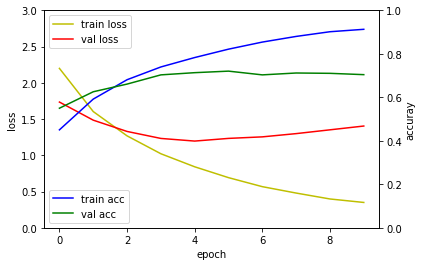

In [7]:
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [8]:

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

2246/2246 [==============================] - 1s 509us/step
## evaluation loss and_metrics ##
[1.5382403076915792, 0.6736420303025844]
